In [4]:
import os
import numpy as np
import pandas as pd
import re
import tools as tl

## Overview of model runs

In [5]:
topDirectory = "./output/15x15"#os.getcwd()
files = [path+'/'+file for path, d, f 
         in os.walk(topDirectory) 
         for file in f if file.endswith(".csv")]
overviewOfRuns = pd.concat([pd.DataFrame([np.array(re.split('[a-z-/.]+',files[n])[1:-1])]) 
           for n in range(0,len(files))])
overviewOfRuns.columns = ['Rows', 'Columns', 'Grid Option', 'Grazing',
                  'Initial Coral Percent', 'Initial Macroalgae Percent',
                      'r', 'd', 'a', 'y', 'Time', 'Record Rate', 'Number of Simulations']
overviewOfRuns = overviewOfRuns.set_index([pd.Series([n for n in range(0,len(files))])])
overviewOfRuns

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
0,15,15,0,80,33,33,10,40,20,75,5010,500,100
1,15,15,0,60,33,33,10,40,20,75,5010,500,100
2,15,15,0,50,33,33,10,40,20,75,5010,500,100
3,15,15,0,40,33,33,10,40,20,75,5010,500,100
4,15,15,0,40,33,33,10,40,20,75,500,90,10
5,15,15,0,70,33,33,10,40,20,75,5010,500,100
6,15,15,0,30,33,33,10,40,20,75,5010,500,100


## Choose Runs to Explore

In [9]:
filesOfInterest = [4]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

In [10]:
## will rewrite this list comprehension to make it neater
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

In [11]:
coralData

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,TurfPatchCount,MacroPatchCount,File
0,0,0,74,70,81,0.31,0.28,0.35,9,2,15,11,4
1,0,90,25,76,124,0.33,0.39,0.62,8,1,11,1,4
2,0,180,13,80,132,0.23,0.42,0.67,5,1,12,2,4
3,0,270,4,61,160,0.20,0.26,0.72,2,1,19,1,4
4,0,360,0,69,156,0.00,0.30,0.69,1,1,15,1,4
5,0,450,0,66,159,0.00,0.31,0.71,1,1,14,1,4
6,1,0,74,70,81,0.31,0.28,0.35,9,2,15,11,4
7,1,90,49,66,110,0.50,0.34,0.62,8,3,12,4,4
8,1,180,39,64,122,0.56,0.30,0.68,3,3,12,1,4
9,1,270,33,59,133,0.59,0.30,0.67,1,1,14,1,4


## Plot chosen Runs

### Coral Node Count v Time, Ordered by Model Runs

File
0    AxesSubplot(0.125,0.125;0.62x0.755)
2    AxesSubplot(0.125,0.125;0.62x0.755)
6    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

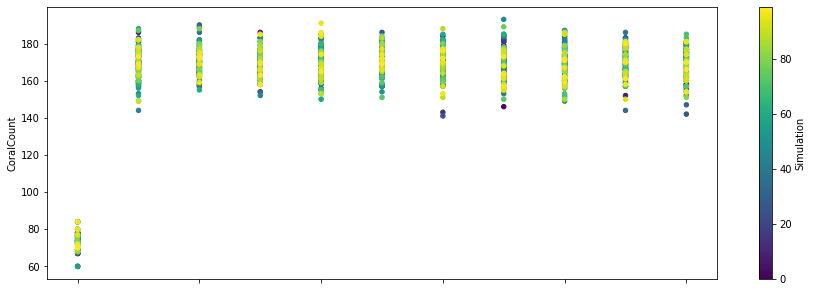

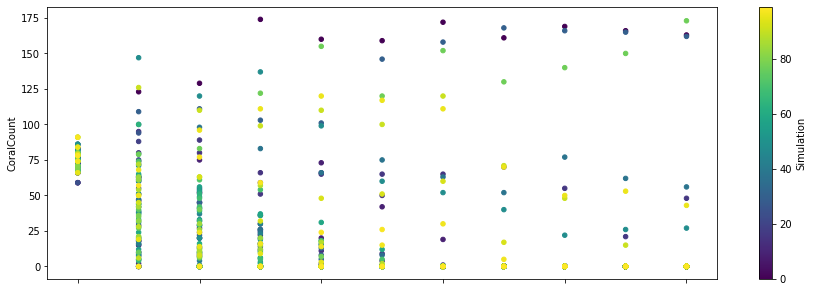

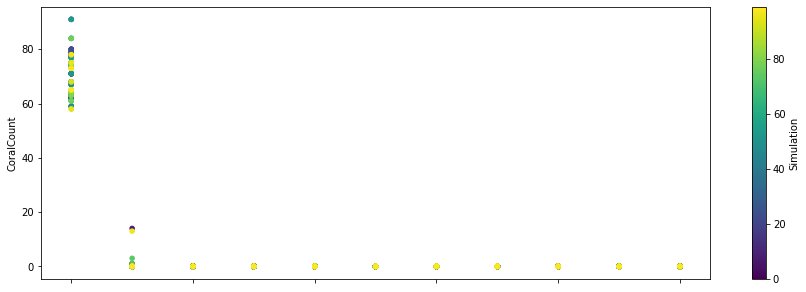

In [20]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation', figsize=(15,5), colormap='viridis')

### Count v Coral Node Count, Ordered by Model Runs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21d0fb70>,
      dtype=object)

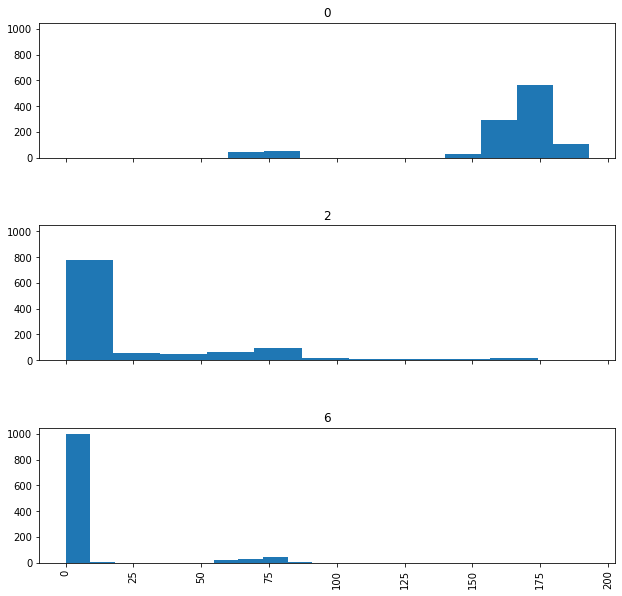

In [21]:
coralData.hist(column='CoralCount', by='File', figsize=(10,10), layout=(len(filesOfInterest),1), sharex=True, sharey=True)

### Coral-Coral Neighbors v Coral Patch Count

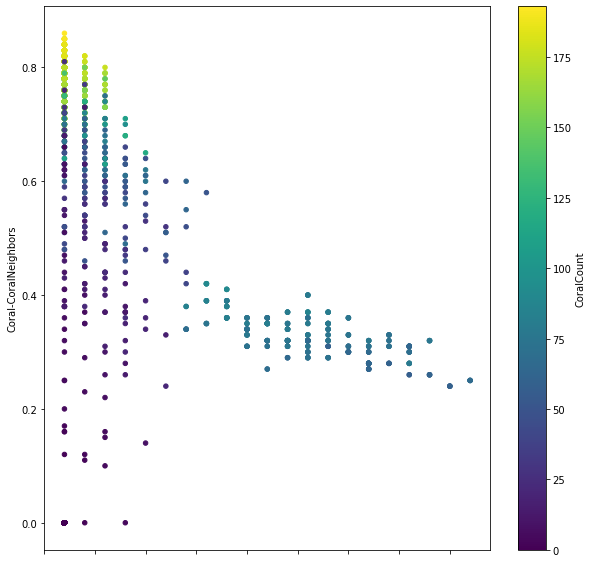

In [20]:
coralData.plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))